# Get Satellite images

## Intro
- MDE
http://www.dsr.inpe.br/topodata/
http://www.webmapit.com.br/inpe/topodata/

    - http://www.dsr.inpe.br/topodata/data/geotiff/22S465ZN.zip
    - http://www.dsr.inpe.br/topodata/data/geotiff/22S48_ZN.zip
    - http://www.dsr.inpe.br/topodata/data/geotiff/23S48_ZN.zip
    - http://www.dsr.inpe.br/topodata/data/geotiff/23S465ZN.zip
## Summary

# Setup

In [1]:
import rasterio as rio
import rioxarray as rioxr

import numpy as np
import matplotlib.pyplot as plt

# Read and write

### From zip file


In [13]:
with rio.open('zip://../data/raster/SRTM/22S465ZN.zip!/22S465ZN.tif') as dataset:
    print(dataset.profile)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 5400, 'height': 3600, 'count': 1, 'crs': None, 'transform': Affine(0.0002777784814814818, 0.0, -46.5,
       0.0, -0.0002777777777777778, -22.0), 'blockysize': 1, 'tiled': False, 'interleave': 'band'}


### From url

c:\Users\lucas.pontes\.conda\envs\geos\Lib\site-packages\rioxarray\_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


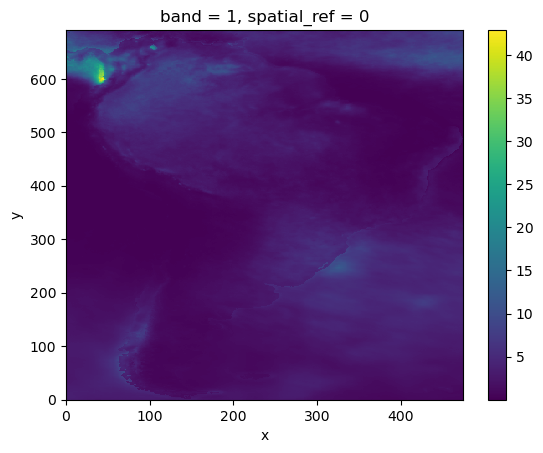

In [15]:
rioxr.open_rasterio('http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/CLIMATOLOGY/MONTHLY_AVERAGE/MERGE_CPTEC_mean_sep.nc').plot()

Some servers require authentication before we can access the data. For this purpose we can explicitly create a backends.PydapDataStore and pass in a Requests session object. For example for HTTP Basic authentication:


In [ ]:
"""import xarray as xr
import requests

session = requests.Session()
session.auth = ('username', 'password')

store = xr.backends.PydapDataStore.open('http://example.com/data',
                                        session=session)
ds = xr.open_dataset(store)"""


"import xarray as xr\nimport requests\n\nsession = requests.Session()\nsession.auth = ('username', 'password')\n\nstore = xr.backends.PydapDataStore.open('http://example.com/data',\n                                        session=session)\nds = xr.open_dataset(store)"

[Pydap’s cas module](https://www.pydap.org/en/latest/client.html#cas) has functions that generate custom sessions for servers that use CAS single sign-on. For example, to connect to servers that require NASA’s URS authentication:


In [ ]:
"""import xarray as xr
from pydata.cas.urs import setup_session

ds_url = 'https://gpm1.gesdisc.eosdis.nasa.gov/opendap/hyrax/example.nc'

session = setup_session('username', 'password', check_url=ds_url)
store = xr.backends.PydapDataStore.open(ds_url, session=session)

ds = xr.open_dataset(store)"""

"import xarray as xr\nfrom pydata.cas.urs import setup_session\n\nds_url = 'https://gpm1.gesdisc.eosdis.nasa.gov/opendap/hyrax/example.nc'\n\nsession = setup_session('username', 'password', check_url=ds_url)\nstore = xr.backends.PydapDataStore.open(ds_url, session=session)\n\nds = xr.open_dataset(store)"

### zip file on the web


In [ ]:
url = 'zip+http://www.dsr.inpe.br/topodata/data/geotiff/22S465ZN.zip!/22S465ZN.tif'
with rio.open(url) as src: 
    print(src.width, src.height)

In [ ]:
rioxr.open_rasterio(url)

<xarray.DataArray (band: 1, y: 3600, x: 5400)>
[19440000 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 -46.5 -46.5 -46.5 -46.5 ... -45.0 -45.0 -45.0 -45.0
  * y            (y) float64 -22.0 -22.0 -22.0 -22.0 ... -23.0 -23.0 -23.0 -23.0
    spatial_ref  int32 0
Attributes:
    TIFFTAG_RESOLUTIONUNIT:  2 (pixels/inch)
    TIFFTAG_SOFTWARE:        IDRISI KILIMANJARO
    TIFFTAG_XRESOLUTION:     87.699997
    TIFFTAG_YRESOLUTION:     87.699997
    scale_factor:            1.0
    add_offset:              0.0

In [23]:
url = 'zip+http://www.dsr.inpe.br/topodata/data/geotiff/22S465ZN.zip!/22S465ZN.tif'
ds = rioxr.open_rasterio(url)

# Visualization

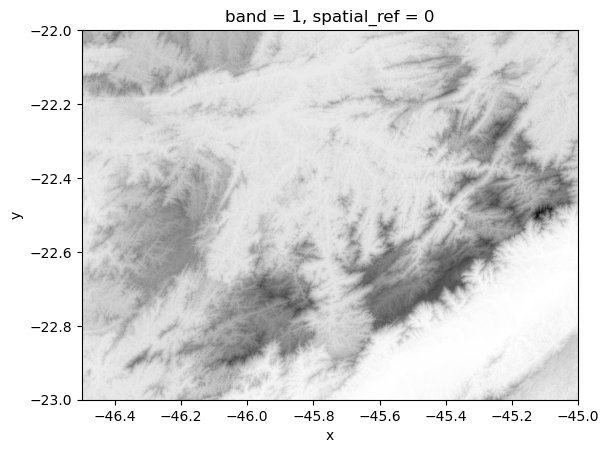

In [19]:
# why squeeze? squeeze remove the dimension of size = 1
img = ds.squeeze().plot(cmap="Greys", add_colorbar=False)

## matplotlib

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


MemoryError: Unable to allocate 580. MiB for an array with shape (14434, 14044, 3) and data type bool

Error in callback <function _draw_all_if_interactive at 0x000001D762B711C0> (for post_execute):


KeyboardInterrupt: 

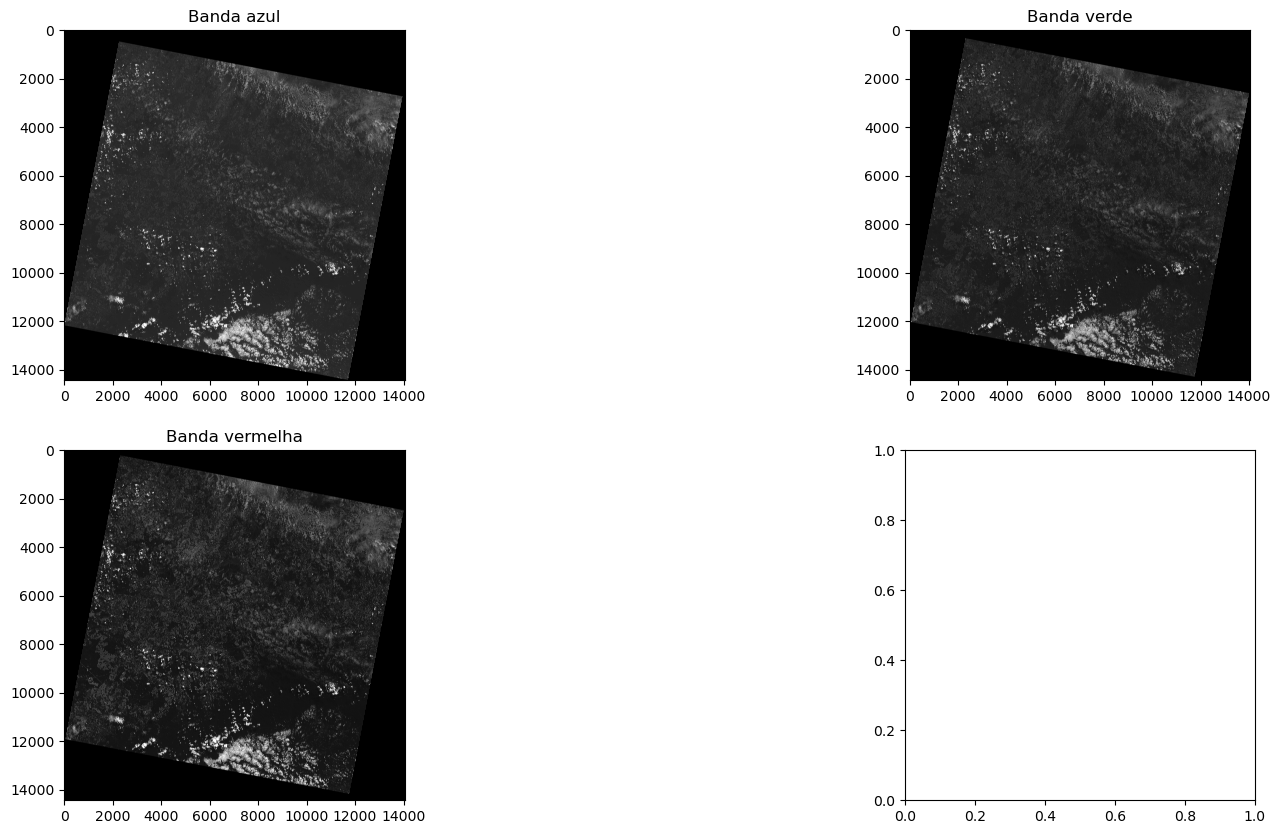

In [20]:
# http://www2.dgi.inpe.br/catalogo/explore

dataset = rio.open('../data/raster/CBERS/CBERS_4A_WPM.tif', mode='r')
# Criação das variáveis com cada banda da imagem CBERS-4A WPM

blue = dataset.read(1)
green = dataset.read(2)
red = dataset.read(3)

# Criação do stack RGB

rgb = np.dstack((red, green, blue))

# Código para visualização

fig, axs = plt.subplots(2,2, figsize=(20,10))
axs[0,0].imshow(blue, cmap='gray')
axs[0,0].set_title('Banda azul')
axs[0,1].imshow(green, cmap='gray')
axs[0,1].set_title('Banda verde')
axs[1,0].imshow(red, cmap='gray')
axs[1,0].set_title('Banda vermelha')
axs[1,1].imshow(rgb*2.5)
axs[1,1].set_title('RGB')

# Linha de código para ajustar a posição de cada plot

# plt.subplots_adjust(wspace=0.1, hspace=0.1,top=0.95, bottom=0.05, left=0.17,
#                     right=0.845)  

MemoryError: Unable to allocate 773. MiB for an array with shape (4, 14434, 14044) and data type bool

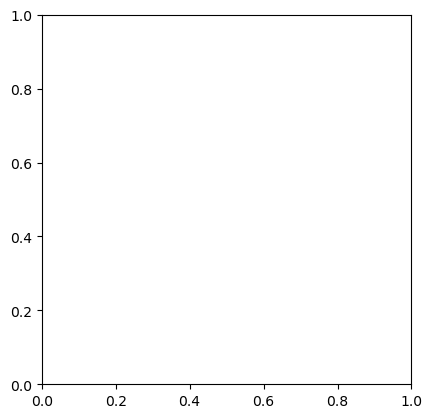

In [21]:
plt.imshow(dataset.read())